In [1]:
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import random
%tensorflow_version 1.x
import keras
from keras.models import Sequential

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
! unzip DRIMDB.zip

Archive:  DRIMDB.zip
   creating: DRIMDB/
  inflating: DRIMDB/.DS_Store        
   creating: __MACOSX/
   creating: __MACOSX/DRIMDB/
  inflating: __MACOSX/DRIMDB/._.DS_Store  
   creating: DRIMDB/Bad/
  inflating: DRIMDB/Bad/drimdb_bad (38).jpg  
   creating: __MACOSX/DRIMDB/Bad/
  inflating: __MACOSX/DRIMDB/Bad/._drimdb_bad (38).jpg  
  inflating: DRIMDB/Bad/drimdb_bad (1).jpg  
  inflating: __MACOSX/DRIMDB/Bad/._drimdb_bad (1).jpg  
  inflating: DRIMDB/Bad/drimdb_bad (14).jpg  
  inflating: __MACOSX/DRIMDB/Bad/._drimdb_bad (14).jpg  
  inflating: DRIMDB/Bad/drimdb_bad (43).jpg  
  inflating: __MACOSX/DRIMDB/Bad/._drimdb_bad (43).jpg  
  inflating: DRIMDB/Bad/drimdb_bad (55).jpg  
  inflating: __MACOSX/DRIMDB/Bad/._drimdb_bad (55).jpg  
  inflating: DRIMDB/Bad/drimdb_bad (22).jpg  
  inflating: __MACOSX/DRIMDB/Bad/._drimdb_bad (22).jpg  
  inflating: DRIMDB/Bad/drimdb_bad (34).jpg  
  inflating: __MACOSX/DRIMDB/Bad/._drimdb_bad (34).jpg  
  inflating: DRIMDB/Bad/drimdb_bad (63).jpg  


In [3]:
os.listdir()

['.config', 'DRIMDB.zip', 'DRIMDB', '__MACOSX', 'sample_data']


# EDA (Part 1)


In [0]:
path1='./DRIMDB/Good/'
list1=os.listdir(path1)
data_good=[]
for elem in list1:
  if elem!='drimdb_good':
    data_good.append(cv2.resize(cv2.imread(path1+elem,1),(512,512)))

In [5]:
print(len(data_good))

125


There are 125 examples of good quality images

In [0]:
path2='./DRIMDB/Bad/'
list2=os.listdir(path2)
data_bad=[]
for elem in list2:
  if elem!='drimdb_bad':
    data_bad.append(cv2.resize(cv2.imread(path2+elem,1),(512,512)))

In [7]:
print(len(data_bad))

69


There are 69 examples of bad quality images

In [8]:
data_good=np.array(data_good)
data_bad=np.array(data_bad)
print(data_good.shape)
print(data_bad.shape)

(125, 512, 512, 3)
(69, 512, 512, 3)


## plotting images of good category

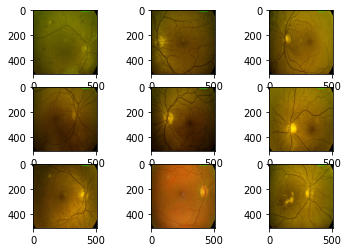

In [0]:
plt.figure(1)
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(cv2.cvtColor(data_good[i], cv2.COLOR_BGR2RGB))
# show the plot
plt.show()

## plotting images of bad category

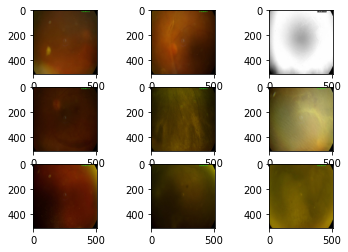

In [0]:
plt.figure(1)
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(cv2.cvtColor(data_bad[i], cv2.COLOR_BGR2RGB))
# show the plot
plt.show()

From the above 2 plots, we can intutively say that the good images are the ones, which have less brightness and the nerves are clearly visible. 

## Combining data from both classes

In [9]:
data=np.concatenate((data_good, data_bad))
print(data.shape)

(194, 512, 512, 3)


## Boundary detection using Canny Edge Detection in OpenCV



Here, I am checking the boundary of the ROI image of this dataset.

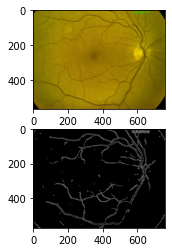

In [0]:
img = cv2.imread(path1+ 'drimdb_good (66).jpg' ,1)
edges = cv2.Canny(img,50,100)

plt.figure(1)
plt.subplot(211)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(212)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()

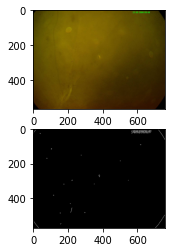

In [0]:
img = cv2.imread(path2+ 'drimdb_bad (45).jpg' ,1)
edges = cv2.Canny(img,50,100)

plt.figure(1)
plt.subplot(211)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(212)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()

I have plotted several random images from both classess. It is clearly visible that the nerves are more visible in the images which belong to good category. Intuitively also, this is correct because an image will of good quality only when the information contained in it is clearly visible. With images of the bad quality, this is not the case.



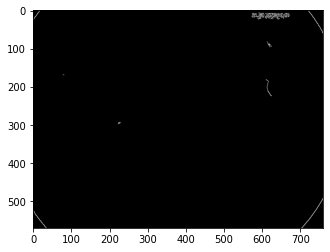

In [0]:
img = cv2.imread(path1+ 'drimdb_good (66).jpg' ,1)
edges = cv2.Canny(img,100,300)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

In this case, we have changed the values in the argument of Canny detector. This is done so that we can only identify the boundary of the ROI of any given image.

In [0]:
edge_canny=[]
for i in range(len(data_good)):
  img=data[i,:,:,:]
  edges = cv2.Canny(img, 100,300)
  edge_canny.append(edges)

edge_canny=np.array(edge_canny)
print(edge_canny.shape)

(125, 512, 512)


In [0]:
avg=np.mean(edge_canny,axis=0)

In [0]:
avg.shape

(512, 512)

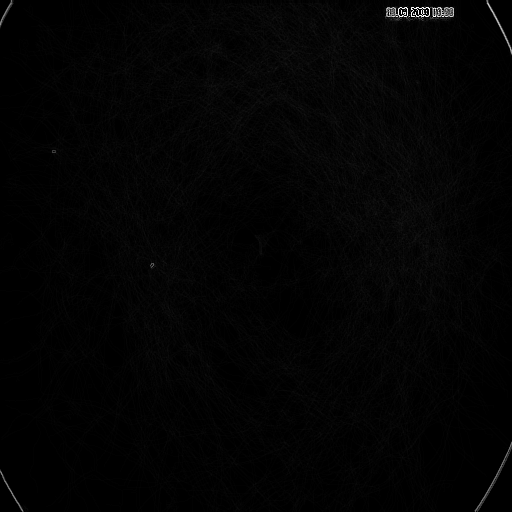

In [0]:
cv2_imshow(avg)

 It can be clearly seen that there exists only 1 boundary, taken in average sense. 

In [0]:
count = 0 
for i in range(512):
  for j in range(512):
    if avg[i,j] > 70:
      count=count+1
print(count)

705


There are only 705 pixels whose value is greater than 70

# Task 1 Complete


# Task 2 Relevant data loaders

In this task, I have defined my own data loader

In [0]:
def LoadDataset(data_path):
  label=0
  data_path1=['Bad', 'Good']
  X=[]
  dict_Y={}
  for sub in data_path1:
      path2=os.path.join(data_path,sub)
      for img_path in os.listdir(path2):
        if '.jpg' in img_path:
          img_path1=os.path.join(path2,img_path)
          X.append(img_path1)
          dict_Y[img_path1]=label
      label=label+1
  return X,dict_Y
    

In total,194 images are there. 

High -- 125
Low -- 69 
  
We further randomly divided this dataset into a train (124 images), validation (31) and test (39) sets.

In [11]:
X,dict_Y=LoadDataset('./DRIMDB')
random.shuffle(X)
print(X)
train_list=X[0:124]
validation_list=X[124:155]
test_list=X[155:194]
dict_X={'train': train_list, 'validation': validation_list, 'test': test_list}

['./DRIMDB/Bad/drimdb_bad (1).jpg', './DRIMDB/Good/drimdb_good (58).jpg', './DRIMDB/Good/drimdb_good (28).jpg', './DRIMDB/Good/drimdb_good (59).jpg', './DRIMDB/Bad/drimdb_bad (41).jpg', './DRIMDB/Bad/drimdb_bad (18).jpg', './DRIMDB/Good/drimdb_good (27).jpg', './DRIMDB/Good/drimdb_good (119).jpg', './DRIMDB/Bad/drimdb_bad (17).jpg', './DRIMDB/Bad/drimdb_bad (25).jpg', './DRIMDB/Good/drimdb_good (78).jpg', './DRIMDB/Good/drimdb_good (80).jpg', './DRIMDB/Good/drimdb_good (68).jpg', './DRIMDB/Good/drimdb_good (36).jpg', './DRIMDB/Good/drimdb_good (25).jpg', './DRIMDB/Good/drimdb_good (4).jpg', './DRIMDB/Good/drimdb_good (9).jpg', './DRIMDB/Good/drimdb_good (32).jpg', './DRIMDB/Good/drimdb_good (43).jpg', './DRIMDB/Good/drimdb_good (53).jpg', './DRIMDB/Good/drimdb_good (76).jpg', './DRIMDB/Good/drimdb_good (120).jpg', './DRIMDB/Bad/drimdb_bad (65).jpg', './DRIMDB/Good/drimdb_good (12).jpg', './DRIMDB/Bad/drimdb_bad (42).jpg', './DRIMDB/Bad/drimdb_bad (7).jpg', './DRIMDB/Bad/drimdb_bad (36)

In [12]:
print(dict_Y)
print(dict_X)

{'./DRIMDB/Bad/drimdb_bad (59).jpg': 0, './DRIMDB/Bad/drimdb_bad (41).jpg': 0, './DRIMDB/Bad/drimdb_bad (43).jpg': 0, './DRIMDB/Bad/drimdb_bad (17).jpg': 0, './DRIMDB/Bad/drimdb_bad (31).jpg': 0, './DRIMDB/Bad/drimdb_bad (39).jpg': 0, './DRIMDB/Bad/drimdb_bad (18).jpg': 0, './DRIMDB/Bad/drimdb_bad (3).jpg': 0, './DRIMDB/Bad/drimdb_bad (33).jpg': 0, './DRIMDB/Bad/drimdb_bad (32).jpg': 0, './DRIMDB/Bad/drimdb_bad (2).jpg': 0, './DRIMDB/Bad/drimdb_bad (50).jpg': 0, './DRIMDB/Bad/drimdb_bad (19).jpg': 0, './DRIMDB/Bad/drimdb_bad (28).jpg': 0, './DRIMDB/Bad/drimdb_bad (5).jpg': 0, './DRIMDB/Bad/drimdb_bad (66).jpg': 0, './DRIMDB/Bad/drimdb_bad (63).jpg': 0, './DRIMDB/Bad/drimdb_bad (37).jpg': 0, './DRIMDB/Bad/drimdb_bad (45).jpg': 0, './DRIMDB/Bad/drimdb_bad (64).jpg': 0, './DRIMDB/Bad/drimdb_bad (58).jpg': 0, './DRIMDB/Bad/drimdb_bad (62).jpg': 0, './DRIMDB/Bad/drimdb_bad (30).jpg': 0, './DRIMDB/Bad/drimdb_bad (14).jpg': 0, './DRIMDB/Bad/drimdb_bad (48).jpg': 0, './DRIMDB/Bad/drimdb_bad (6

In [0]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, list_IDs, labels, batch_size=39, dim=(512, 512), n_channels=3,
                 n_classes=2, shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        X, y = self.__data_generation(list_IDs_temp)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)
        for i, ID in enumerate(list_IDs_temp):
            temp=cv2.imread(ID,1)
            temp=cv2.resize(temp, self.dim)
            X[i,]=temp
          
            y[i] = self.labels[ID]
        return X, y

# Task 2 Complete

# Task 3 Model Making

I have implemented the SWAP version of the model described in the paper. SWAP stands for Shifted - Weighted Average Pooling. 

In [0]:
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam, Nadam, RMSprop
from keras.layers import Input, Flatten, Conv2D, Layer, Activation
from keras.layers.advanced_activations import LeakyReLU, ReLU, ELU
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import random


In [20]:
keras.backend.backend()

'tensorflow'

In [0]:
num_filters_1=64
num_filters_2=128
num_filters_3=256
num_filters_4=512


In [0]:
class Weighted(Layer):
    def __init__(self, **kwargs):
        self.output_dim = 1
        super(Weighted, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.input_dim=input_shape[1]
        self.W = self.add_weight(name='W1', 
                                shape=(input_shape[1],1),
                                initializer='uniform',
                                trainable=True)
        self.B = self.add_weight((1,),
                                 initializer='zero',
                                 name='B1',
                                trainable=True)
        W, B = self.get_weights()
        W = W / np.sum(np.absolute(W))
        self.set_weights([W, B])
        super(Weighted, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        W, B = self.get_weights()
        output = K.dot(x, K.abs(self.W/K.sum(K.abs(self.W)))) + self.B
        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)


class Shifted(Layer):
    def __init__(self, **kwargs):
        self.output_dim = 1
        super(Shifted, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.input_dim=input_shape[1]
        super(Shifted, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        output = x - 0.5
        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

In [0]:
input=Input((512, 512, 3))
conv1=Conv2D(filters = num_filters_1 , kernel_size = (3,3), padding='SAME',strides=(1,1), data_format="channels_last")(input)
max1=MaxPooling2D((2, 2))(conv1)

max1=ReLU()(max1)
max1 = BatchNormalization()(max1)

conv2=Conv2D(filters = num_filters_2 , kernel_size = (3,3),padding='SAME' ,strides=(1,1), data_format="channels_last")(max1)
max2=MaxPooling2D((2, 2))(conv2)

max2=ReLU()(max2)

max2 = BatchNormalization()(max2)

conv3=Conv2D(filters = num_filters_3 , kernel_size = (3,3), padding='SAME',strides=(1,1), data_format="channels_last")(max2)
max3=MaxPooling2D((2, 2))(conv3)

max3=ReLU()(max3)

max3 = BatchNormalization()(max3)

conv4=Conv2D(filters = num_filters_4 , kernel_size = (3,3), padding='SAME',strides=(1,1), data_format="channels_last")(max3)
max4=MaxPooling2D((2, 2))(conv4)

max4=ReLU()(max4)

max4 = BatchNormalization()(max4)

conv5=Conv2D(filters = num_filters_4, kernel_size= (1,1), padding='SAME',strides=(1,1), data_format="channels_last")(max4)

max5=ReLU()(conv5)

max4=max5

max4 = BatchNormalization()(max4)

patch_pred=Conv2D(filters = 1, kernel_size= (1,1), strides=(1,1), data_format="channels_last", activation='sigmoid')(max4)

out = Flatten()(patch_pred)

out = Weighted()(out)
out=Shifted()(out)
out=Activation('sigmoid')(out)

In [0]:
model=Model(input, out)

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 64)      0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256, 256, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 128)     0   

In [0]:
opt = Adam(lr=1e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
params = {'dim': (512,512),
          'batch_size': 10,
          'n_classes': 2,
          'n_channels': 3,
          'shuffle': True}

In [43]:
training_generator = DataGenerator(dict_X['train'], dict_Y, **params)
validation_generator = DataGenerator(dict_X['validation'], dict_Y, **params)
test_generator = DataGenerator(dict_X['test'], dict_Y)
print(test_generator.batch_size)

39


In [44]:
history=model.fit_generator(generator=training_generator,
                    validation_data=validation_generator, epochs=140)

Epoch 1/140
12/12 [==============================] - 5s 429ms/step - loss: 0.6410 - acc: 0.7000 - val_loss: 0.5511 - val_acc: 0.9000
Epoch 2/140
12/12 [==============================] - 3s 253ms/step - loss: 0.5968 - acc: 0.8000 - val_loss: 0.5381 - val_acc: 0.9333
Epoch 3/140
12/12 [==============================] - 3s 256ms/step - loss: 0.5709 - acc: 0.8417 - val_loss: 0.5331 - val_acc: 0.9333
Epoch 4/140
12/12 [==============================] - 3s 256ms/step - loss: 0.5507 - acc: 0.9167 - val_loss: 0.5387 - val_acc: 0.9000
Epoch 5/140
12/12 [==============================] - 3s 255ms/step - loss: 0.5380 - acc: 0.9333 - val_loss: 0.5370 - val_acc: 0.9000
Epoch 6/140
12/12 [==============================] - 3s 258ms/step - loss: 0.5426 - acc: 0.9250 - val_loss: 0.5224 - val_acc: 0.9333
Epoch 7/140
12/12 [==============================] - 3s 256ms/step - loss: 0.5297 - acc: 0.9250 - val_loss: 0.5282 - val_acc: 0.9333
Epoch 8/140
12/12 [==============================] - 3s 261ms/step - 

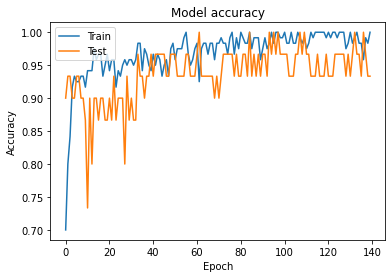

In [45]:

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



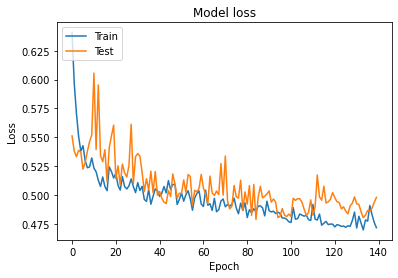

In [46]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Task 3 Complete

# Task 4 Hyperparameter Tuning

I was not getting good accuray with the model given in the paper. To further improve the accuracy of the model, I added the layer of Batch Normalization after every Conv Layer. 

But, still the model was getting overtrained. To improve further, I used data augmentation technique and appended the augmented images to the training data. 



In [0]:
def LoadDataset_array():
  data_path='./DRIMDB'
  data_path1=['Bad', 'Good']
  X=[]
  Y=[]
  label=0
  for sub in data_path1:
      path2=os.path.join(data_path,sub)
      for img_path in os.listdir(path2):
        if '.jpg' in img_path:
          img_path1=os.path.join(path2,img_path)
          X.append(cv2.resize(cv2.imread(img_path1,1),(512, 512)))
          Y.append(label)
      label=label+1
  z = list(zip(X, Y))
  random.shuffle(z)
  X,Y = zip(*z)
  return X,Y

In [33]:
X,Y=LoadDataset_array()
print(len(X))
print(len(Y))

194
194


In [0]:
#splitting of data into train, val and test
X_train=X[0:124]
Y_train=Y[0:124]

X_val=X[124:155]
Y_val=Y[124:155]

X_test=X[155:194]
Y_test=Y[155:194]


In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_val = np.array(X_val)
Y_val = np.array(Y_val)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [0]:
data_train = ImageDataGenerator(horizontal_flip=True, vertical_flip=True,
                                 width_shift_range=0.15, height_shift_range=0.15,
                                 rotation_range=45, zoom_range=0.15)

data_valid = ImageDataGenerator()

data_test = ImageDataGenerator()



train_data = data_train.flow(X_train, Y_train, batch_size=10)

val_data = data_valid.flow(X_val, Y_val, batch_size=10)

test_data= data_test.flow(X_test, Y_test, batch_size=10)



In [0]:
model.fit_generator(generator=train_data,
                    validation_data=val_data, epochs=140)

In [0]:
model.save_weights('model.h5')

In [0]:
pred = model.predict_generator(test_data)

In [77]:
pred.shape

(39, 1)

In [80]:
pred1=[]
for i in range(39):
  if pred[i]>=0.5:
      pred1.append(1)
  else:
      pred1.append(2)

y_true=[]
for i in range(len(dict_X['test'])):
  y_true.append(dict_Y[dict_X['test'][i]])

np.sum(np.abs(np.array(Y_test)-np.array(pred1)))

37


## In the previous section, We have added the batch normalization layer and experimented with data augmentation techniques. Now I will tune the hyperparameters associated with this model. For this I am using talos. 



In [0]:
! pip install talos

We will making a function eyes_model, in which our main model is defined.

In [0]:
def eyes_model(x_train, y_train, x_val, y_val, params):
    input=Input((512, 512, 3))
    conv1=Conv2D(filters = num_filters_1 , kernel_size = (3,3), padding='SAME',strides=(1,1), data_format="channels_last")(input)
    max1=MaxPooling2D((2, 2))(conv1)
    max1=params['activation'](max1)
    max1 = BatchNormalization()(max1)

    conv2=Conv2D(filters = num_filters_2 , kernel_size = (3,3),padding='SAME' ,strides=(1,1), data_format="channels_last")(max1)
    max2=MaxPooling2D((2, 2))(conv2)
    max2=params['activation'](max2)
    max2 = BatchNormalization()(max2)

    conv3=Conv2D(filters = num_filters_3 , kernel_size = (3,3), padding='SAME',strides=(1,1), data_format="channels_last")(max2)
    max3=MaxPooling2D((2, 2))(conv3)
    max3=params['activation'](max3)
    max3 = BatchNormalization()(max3)

    conv4=Conv2D(filters = num_filters_4 , kernel_size = (3,3), padding='SAME',strides=(1,1), data_format="channels_last")(max3)
    max4=MaxPooling2D((2, 2))(conv4)
    max4=params['activation'](max4)
    max4 = BatchNormalization()(max4)

    conv5=Conv2D(filters = num_filters_4, kernel_size= (1,1), padding='SAME',strides=(1,1), data_format="channels_last")(max4)

    max5=params['activation'](conv5)
    max4=max5
    max4 = BatchNormalization()(max4)
    patch_pred=Conv2D(filters = 1, kernel_size= (1,1), strides=(1,1), data_format="channels_last", activation='sigmoid')(max4)
    out = Flatten()(patch_pred)

    out = SWAP()(out)
    out=SWAP1()(out)
    out=Activation('sigmoid')(out)

    model = Model(input, out)
    model.compile(optimizer=Adam(2e-4), loss=params['losses'], metrics=['accuracy'])
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0)
    return history, model

For optimization, I have considered these many pararmeters


1.   batch_size
2.   epochs
3.   optimizer
4.   losses
5.   activation 

Other parameters could also have been changed like fliter size, no of conv layers, number of filters, input size of the model. 



The results corresponding to the different combinations are attached in a csv file. Please see through it. 

In [0]:
import talos as ta
p = {'batch_size': (10, 20, 40),
     'epochs': [40, 80, 100 ,150],
     #'optimizer': [Adam(1e-4), Adam(1e-3), Adam(2e-4), Nadam(1e-4),Nadam(1e-3)],
     'losses': ['logcosh', 'binary_crossentropy'],
     'activation':[ReLU(), ELU(), LeakyReLU()]
     }
    
x=np.array(X[0:155])
y=np.array(Y[0:155])

t = ta.Scan(x=x,
            y=y,
            model=eyes_model, 
            params=p, experiment_name='exp1', val_split=0.2)




  0%|          | 0/240 [00:00<?, ?it/s]

  0%|          | 1/240 [01:14<4:57:00, 74.56s/it]

  1%|          | 2/240 [02:29<4:56:13, 74.68s/it]

  1%|▏         | 3/240 [04:54<6:18:17, 95.77s/it]

  2%|▏         | 4/240 [07:20<7:15:39, 110.76s/it]

  2%|▏         | 5/240 [10:21<8:36:40, 131.92s/it]

  2%|▎         | 6/240 [13:23<9:33:06, 146.95s/it]

  3%|▎         | 7/240 [17:53<11:53:59, 183.86s/it]

  3%|▎         | 8/240 [22:24<13:31:24, 209.85s/it]

  4%|▍         | 9/240 [23:38<10:52:07, 169.38s/it]

  4%|▍         | 10/240 [24:52<8:59:20, 140.70s/it]

  5%|▍         | 11/240 [27:15<8:59:34, 141.37s/it]

  5%|▌         | 12/240 [29:39<9:00:19, 142.19s/it]

  5%|▌         | 13/240 [32:38<9:39:07, 153.07s/it]

  6%|▌         | 14/240 [35:37<10:05:49, 160.84s/it]

  6%|▋         | 15/240 [40:03<12:01:25, 192.38s/it]

  7%|▋         | 16/240 [44:29<13:20:56, 214.54s/it]

  7%|▋         | 17/240 [45:42<10:39:44, 172.13s/it]

  8%|▊         | 18/240 [46:55<8:46:33, 142.31s/it] 

  8%|▊ 

# Task 5 - Intermediates (explainability)

In [0]:
model1=Model(input,patch_pred)

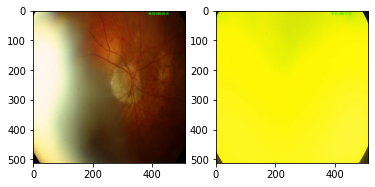

In [71]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(data_bad[3], cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(data_bad[6], cv2.COLOR_BGR2RGB))

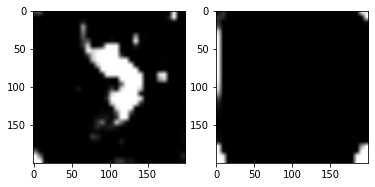

In [72]:
test1=np.reshape(data_bad[3], (1,512, 512, 3))
test2=np.reshape(data_bad[6], (1,512, 512, 3))
heat_map1=model1.predict(test1)
heat_map2=model1.predict(test2)
heat_map1=np.reshape(heat_map1, (32,32,1))
heat_map2=np.reshape(heat_map2, (32,32,1))
heat_map1=heat_map1 * 255
heat_map2=heat_map2 * 255
heat1 = cv2.resize( heat_map1,(200,200))
heat2 = cv2.resize( heat_map2,(200,200))
f, axarr = plt.subplots(1,2)
axarr[0].imshow(heat1, cmap='gray')
axarr[1].imshow(heat2, cmap='gray')

These 2 masks images are the corresponding intermediates of 2 bad quality images. In the first image, you can easily see that the left side is quite brighter and on the right side, it is quite darker. In both these regions, there is not much information we can extract because of luminous nature. This is the reason, why everything appears black in the intermediate, except in the middle portion.

Second image also has the same case.

ERROR! Session/line number was not unique in database. History logging moved to new session 59


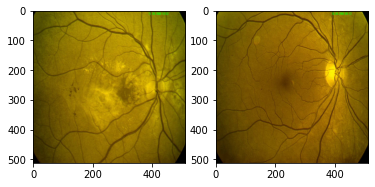

In [74]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(data_good[4], cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(data_good[6], cv2.COLOR_BGR2RGB))

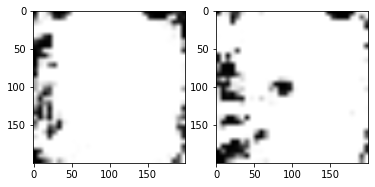

In [75]:
test1=np.reshape(data_good[4], (1,512, 512, 3))
test2=np.reshape(data_good[6], (1,512, 512, 3))
heat_map1=model1.predict(test1)
heat_map2=model1.predict(test2)
heat_map1=np.reshape(heat_map1, (32,32,1))
heat_map2=np.reshape(heat_map2, (32,32,1))
heat_map1=heat_map1 * 255
heat_map2=heat_map2 * 255
heat1 = cv2.resize( heat_map1,(200,200))
heat2 = cv2.resize( heat_map2,(200,200))
f, axarr = plt.subplots(1,2)
axarr[0].imshow(heat1, cmap='gray')
axarr[1].imshow(heat2, cmap='gray')

In this case, both the intermediates are majorly white because they corresponds to good quality images.
In both cases, the brightness in the image is appropriate and nerves are also very clearly visible.

### This shows that our model is capable of pinpointing low quality regions in the image.

# Task 6 - Criticize the paper explaining its drawbacks
In the paper, authors are using the notion of Multiple Instance Learning (MIL). In this approach, they have considered an image equivalent to a number of instances. They are dividing the whole image into different regions and then each region is treated as an instance. But they have used CNN for this task. In CNN, all the filters present in any layer are convolved with all the patches of an image. So, the weights associated with a single filter are not unique to any particular patch.


They have used the concept of ‘weighted average’. In this case, weights are assigned to different patches and the convex combination of the outputs of different patches is the final output/label for that image. This implies that the model has gained bias towards a few patches. So, for any new image, this model assumes that the relevant information is stored only in those patches. But this might not be the case. 


Patches in the resultant map are also overlapping because a patch’s information is shared with its neighbouring patches, while convolving with the filters in the intermediate layer. So, the resultant feature map(before flattening) contains instances which are not independent of each other. 
# Task 7 - Suggest alternatives / improvements to the model
I haven’t tried these alternatives.


Initially, divide the whole image into different segments and for each segment, make a separate neural network. Obtain individual outputs from these segments and using ‘weighted average’, assign a single label to an image. In this case, all the segments will be trained simultaneously, because the loss function will only contain the true label and the final predicted label, not the outputs of the segments.


In this model, the image is directly given as an input to the model. We can also append a filtered image with this source image and, then this combination can be given to the model. This filtered image can be the output of the Canny Edge detection Algorithm.


Sometimes on these small datasets, Statistical Pattern Models(SPR) are also worth trying like Gaussian Mixture Model(GMM), etc.
After obtaining the outputs of different patches, train a FCL(Fully Connected Layer) with the ‘binary_crossentropy’ loss. 
